# Introduction to the SecML library

In this tutorial, you will learn the basic components of the [SecML library](https://github.com/pralab/secml).
At the end of the exercise, you will be familiar with the core data structure of the library, the [CArray](https://secml.readthedocs.io/en/v0.15/secml.array.html), and how to import pre-trained machine learning models trained with [scikit-learn](https://scikit-learn.org/stable/index.html) and [PyTorch](https://pytorch.org) (with a brief tutorial on it).

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/zangobot/teaching_material/blob/main/00-SecML.ipynb)

# Install SecML

First, we have to install and import the SecML library. We can do that in Colab with the following lines:

In [1]:
try:
  import secml
except ImportError:
  %pip install git+https://github.com/pralab/secml

  Cloning https://github.com/pralab/secml to /tmp/pip-req-build-quxtb3wq
  Running command git clone --filter=blob:none --quiet https://github.com/pralab/secml /tmp/pip-req-build-quxtb3wq
  Resolved https://github.com/pralab/secml to commit 660540d86427ba583cf57b3f07846a2b9494afa0
  Preparing metadata (setup.py) ... done
  Created wheel for secml: filename=secml-0.15.6-py3-none-any.whl size=464025 sha256=84a00df1f478da4787d113c4816ab23d398c5b3d34634023df541ae8e818327f
  Stored in directory: /tmp/pip-ephem-wheel-cache-y8qn6eat/wheels/22/d7/97/6c54183f8e63358a946e938cc5ca912832afe4a0b9d9b3d736
Successfully built secml


(OPTIONAL) If you want to use SecML **locally**, you can install it in your environment.

Before installing SecML, we strongly suggest to create an environment where to download all the dependancies of the library through Anaconda Python. Follow the linked page to install Miniconda (a minimal version of Conda). After the installation, you can create a conda environment from your command line:

```
conda create -n secml python=3.8
```

Once the environment has been installed, you can activate it and install SecML:

```
conda activate secml
python -m pip install "secml[pytorch,foolbox]"
python -m install notebook
```

Once the procedure is complete, you can verify that SecML is correctly installed inside your environment. Open a Python interpreter and type:

```
import secml
print(secml.__version__)
```

Restart the notebook inside the conda environment to continue the exercise. Execute the following code to ensure you can access SecML inside the notebook.

# Part 1 - CArray: the basic data structure

The CArray is the base class that is used inside SecML to create vectors and matrices.
If you are already familiar with NumPy, you will recognize many functions and helpers along the tutorial.

In [8]:
from secml.array import CArray

x = CArray([0,1,2,3])
print(x)
print('Shape of single-row vector: ', x.shape)
new_x = CArray([[1,2,3,4]])
print(new_x)
print(new_x.shape)
x = CArray([[0,1,2,3], [4,5,6,7]])
print(x)
print('Shape of 2D vector:', x.shape)

CArray([0 1 2 3])
Shape of single-row vector:  (4,)
CArray([[1 2 3 4]])
(1, 4)
CArray([[0 1 2 3]
 [4 5 6 7]])
Shape of 2D vector: (2, 4)


You can perform basic mathematical operations between CArrays:

In [9]:
x1 = CArray([1,2,3,4])
x2 = CArray([5,6,7,8])

print(x1 + x2)  # element-wise sum
print(x1 - x2)  # element-wise subtraction
print(x1 * x2)  # element-wise multiplication
print(x1 / x2)  # element-wise division
print(x1.dot(x2))  # dot product
print(x1.T)  # transpose
print(x1.norm(order=2))  # compute norm

CArray([ 6  8 10 12])
CArray([-4 -4 -4 -4])
CArray([ 5 12 21 32])
CArray([0.2      0.333333 0.428571 0.5     ])
70
CArray([[1]
 [2]
 [3]
 [4]])
5.477225575051661


You can perform operations between **2D** vectors:

In [10]:
x1 = CArray([[1,2,3,4],[1,2,3,4]])
x2 = CArray([[5,6,7,8], [5,6,7,8]])

print(x1 + x2)  # element-wise sum
print(x1 - x2)  # element-wise subtraction
print(x1 * x2)  # element-wise multiplication
print(x1 / x2)  # element-wise division
print(x1.T.dot(x2))  # dot product between (4,2) and (2,4) matrices
print(x1.norm_2d(order=2, axis=0))  # norm of each column
print(x1.norm_2d(order=2, axis=1))  # norm of each row
print(x1.flatten(), x1.flatten().shape)  # flatten the matrix to one single row

CArray([[ 6  8 10 12]
 [ 6  8 10 12]])
CArray([[-4 -4 -4 -4]
 [-4 -4 -4 -4]])
CArray([[ 5 12 21 32]
 [ 5 12 21 32]])
CArray([[0.2      0.333333 0.428571 0.5     ]
 [0.2      0.333333 0.428571 0.5     ]])
CArray([[10 12 14 16]
 [20 24 28 32]
 [30 36 42 48]
 [40 48 56 64]])
CArray([[1.414214 2.828427 4.242641 5.656854]])
CArray([[5.477226]
 [5.477226]])
CArray([1 2 3 4 1 2 3 4]) (8,)


You can import data from numpy, by passing a numpy array to the CArray constructor. **PLEASE REMARK** that the CArray class only supports **2D** data. Passing a high-dimensional data shape will result in a flattened array.

In [12]:
import numpy as np

x = np.array([0,1,2,3])
print('Numpy array:', x, 'with type', type(x))
x = CArray(x)
print('CArray of numpy array:', x, 'with type', type(x))
x = x.tondarray()
print('Back to ', type(x))

# demonstrate flatten behavior   this part is important for colored images
x = np.random.rand(10,10,10)
xc = CArray(x)   # 3d becomes 2d
print('NumPy shape:', x.shape)
print('CArray shape:', xc.shape)

Numpy array: [0 1 2 3] with type <class 'numpy.ndarray'>
CArray of numpy array: CArray([0 1 2 3]) with type <class 'secml.array.c_array.CArray'>
Back to  <class 'numpy.ndarray'>
NumPy shape: (10, 10, 10)
CArray shape: (10, 100)


The CArray class offers helper functions to create data from known distributions, like the [Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution):

In [ ]:
x = CArray.randn((3,3))  # normal distribution
print(x)
x = CArray.zeros((2,5))  # 2D vector with only zeros
print(x)
x = CArray.ones((3,3))  # 2D vector with only ones
print(x)
x = CArray.eye(4,4)
print(x)

# Exercise 1
Use the code above to complete the assignment.
* Create two CArray from the normal distribution with shape (5,6)
* Compute the dot product of the two newly-created CArray
* Flatten the result and compute the euclidean norm (which order?)
* Create an identity of shape (5,5) and a 2D vectors of zeros with shape (5,5)
* Sum and multiply the two newly-created CArray

In [ ]:
# TODO write your code here
x = CArray.randn((5,6))
y = CArray.randn((5,6))
z = x.T.dot(y)


# Part 2 - Create datasets

We are going to use a simple toy dataset
 consisting of 3 clusters of points, normally distributed.

Each dataset of SecML is a `CDataset` object, consisting of `dataset.X` and `dataset.Y`, where the samples and the corresponding labels are stored, respectively.

In [13]:
random_state = 999

n_features = 2   # number of features
n_samples = 1250   # number of samples
centers = [[-2, 0], [2, -2], [2, 2]]   # centers of the clusters
cluster_std = 0.8   # standard deviation of the clusters

from secml.data.loader import CDLRandomBlobs
dataset = CDLRandomBlobs(n_features=n_features,
                         centers=centers,
                         cluster_std=cluster_std,
                         n_samples=n_samples,
                         random_state=random_state).load()

The dataset will be split in *training* and *test*, and normalized in the standard interval `[0, 1]` with a *min-max* normalizer.

In [14]:
n_tr = 1000  # number of training set samples
n_ts = 250  # number of test set samples

# split in training and test
from secml.data.splitter import CTrainTestSplit
splitter = CTrainTestSplit(
    train_size=n_tr, test_size=n_ts, random_state=random_state)
tr, ts = splitter.split(dataset)

# normalize the data
from secml.ml.features import CNormalizerMinMax
nmz = CNormalizerMinMax()
tr.X = nmz.fit_transform(tr.X)
ts.X = nmz.transform(ts.X)

Let’s visualize the dataset in a 2D plane.
The three clusters are clearly separable and normalized as we required.

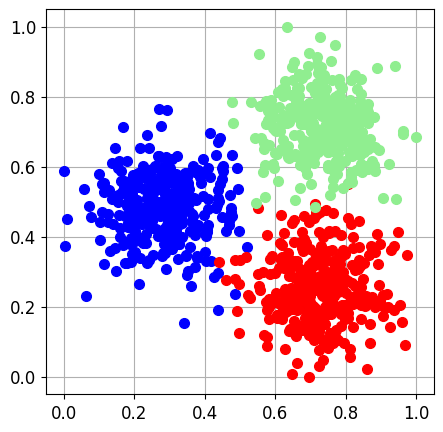

In [16]:
from secml.figure import CFigure
# only required for visualization in notebooks
%matplotlib inline

fig = CFigure(width=5, height=5)

# convenience function for plotting a dataset
fig.sp.plot_ds(tr)

fig.show()

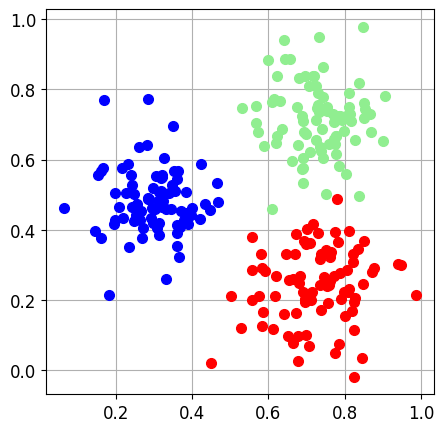

In [17]:
from secml.figure import CFigure
# only required for visualization in notebooks
%matplotlib inline

fig = CFigure(width=5, height=5)

# convenience function for plotting a dataset
fig.sp.plot_ds(ts)

fig.show()

# Part 3 - Use classifiers with SecML

The SecML library offers wrappers for PyTorch and scikit-learn models.
More details on the creation and training of models inside SecML can be found on the [GitHub repository](https://github.com/pralab/secml/tree/master/tutorials). Wrapping a model is easy: the library offers classes that accepts models from the desired framework.

In [ ]:
# wrapping a scikit-learn classifier
from sklearn.svm import SVC
from secml.ml.classifiers import CClassifierSkLearn # cannot compute gradient since it is general wrapper. you can use it to wrap random forest which doesn't have gradients.
model = SVC()
secml_model = CClassifierSkLearn(model)

# evasion attack: if you have the model, the best thing to do is to use the gradient to ascent or descent on the loss function
# so for gradient based attacks (evasion attack) CClassifierSVM is required.

# from secml.ml.classifiers import CClassifierSVM   # this can help you computing gradients
# secml_svm = CClassifierSVM()
# print(secml_svm)

Models can also be trained with SecML. We are going to use the dataset from before.

In [ ]:
secml_model.fit(tr.X,tr.Y)

## Visualization of the decision regions of the classifiers

Once the classifier is trained, we can visualize the *decision regions* over the entire feature space.

In [ ]:
fig = CFigure(width=5, height=5)

# convenience function for plotting the decision function of a classifier
fig.sp.plot_decision_regions(secml_model, n_grid_points=200)

fig.sp.plot_ds(ts)
fig.sp.grid(grid_on=False)

fig.sp.title("Classification regions")
fig.show()

# Exercise 2

* Compute the accuracy of the trained model on the test data, using SecML

In [ ]:
# TODO compute predictions

# Hints
# -----
# predictions = secml_model.predict(...)
#
# # this class computes the accuracy of a model
# from secml.ml.peval.metrics import CMetricAccuracy
# metric = CMetricAccuracy()
#
# accuracy = metric.performance_score(y_true=..., y_pred=...)
#
# print("Accuracy on the test set", accuracy)

# Part 3 - PyTorch tutorial in SecML
[PyTorch](https://pytorch.org) is a framework for creating deep neural networks, and it is implemented to handle the back-propagation as smooth as possible, by already providing implementations of the most used layers (convolutions, dense, etc.)

A PyTorch neural network is defined as a class that defines its architecture and how if performs the forward pass. You can find more examples in the [PyTorch documentation](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html).

In [ ]:
from torch import nn
import torch

class Net(nn.Module):
    """Model with input size (-1, 28, 28) for MNIST 10-classes dataset."""
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = torch.relu(torch.max_pool2d(self.conv1(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

The `Net` class extends the `Module` PyTorch class, and the constructor `__init__` function specifies the architecture. Note that the last layer has 10 outputs, as the number of classes of our dataset. Then, the `forward` function describes how to pass the input through all the defined layers (with activation functions).

Now we download the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to train the classifier.

In [ ]:
n_tr = 3000  # number of training samples
n_ts = 1000  # number of testing samples

from secml.data.loader import CDataLoaderMNIST

loader = CDataLoaderMNIST()
tr = loader.load('training')
ts = loader.load('testing', num_samples=n_ts)

# normalize the data
tr.X /= 255
ts.X /= 255

With data and the architecture, we can start the training phase.
We will use [Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) to fine-tune the weights of all the layers of the neural network. Lastly, we need a function that quantifies how much the network is performing well while training, that will be used by the optimizer as a guide.
We define a *loss function*, in this case the [Cross-entropy loss](https://en.wikipedia.org/wiki/Cross_entropy) that quantify the error committed by the neural network.
The larger the loss, the worse the network is behaving. The SGD optimizer will update the model weights to reduce the value of this loss function, and hence creating a network that has a high classification performance.

In [ ]:
import torch.optim as optim

net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
loss_function = nn.CrossEntropyLoss()

We can now pass all the ingredients to the SecML wrapper for PyTorch models and train our network.

In [ ]:
from secml.ml.classifiers import CClassifierPyTorch
clf = CClassifierPyTorch(model=net,
                         loss=loss_function,
                         optimizer=optimizer,
                         epochs=3,
                         batch_size=20,
                         input_shape=(1, 28, 28),
                         random_state=0)

clf.fit(tr.X, tr.Y)

We can now test the trained network on few samples.

In [ ]:
label_torch = clf.predict(ts.X, return_decision_function=False)

from secml.ml.peval.metrics import CMetric
metric = CMetric.create('accuracy')
acc_torch = metric.performance_score(ts.Y, label_torch)

print("Model Accuracy: {}".format(acc_torch))

We can now visualize some samples along with their predictions.

In [ ]:
from secml.figure import CFigure
# only required for visualization in notebooks
%matplotlib inline

# let's define a convenience function to easily plot the MNIST dataset
def show_digits(samples, preds, labels, digs, n_display=8):
    samples = samples.atleast_2d()
    n_display = min(n_display, samples.shape[0])
    fig = CFigure(width=n_display*2, height=3)
    for idx in range(n_display):
        fig.subplot(2, n_display, idx+1)
        fig.sp.xticks([])
        fig.sp.yticks([])
        fig.sp.imshow(samples[idx, :].reshape((28, 28)), cmap='gray')
        fig.sp.title("{} ({})".format(digs[labels[idx].item()], digs[preds[idx].item()]),
                     color=("green" if labels[idx].item()==preds[idx].item() else "red"))
    fig.show()

digits = list(range(10))
show_digits(ts.X[:5, :], clf.predict(ts.X[:5, :]), ts.Y[:5], digits)

# Exercise 3
Use the code of this tutorial as an example to complete the assignment.
* Create a sklearn KNN classifier and wrap it with SecML
* Create a SecML wrapper for the newly created classifier
* Fit the classifier on the MNIST dataset using SecML
* Compute the accuracy on the test set


In [ ]:
# TODO write your code here

# Hints
# -----
#
# from sklearn.neighbors import KNeighborsClassifier
# sklearn_clf = ...
# secml_clf = ...
#
# # code for training and testing the classifier
# ...